# Laboratory 1
## Aga Patro

### Configuration


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
from random import uniform, random, seed, randint
from math import pi, sin, cos

### Interface


In [19]:
class PointsCollection:
    def __init__(self, points = [], color = 'mediumorchid', marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = 'violet'):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Solution

    exc. 1 + exc. 2: Przygotuj następujące zbiory punktów (2D, współrzędne rzeczywiste typu double) + uruchom       wizualizację graficzną utworzonych zbiorów punktów.

    a) 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000]

<IPython.core.display.Javascript object>


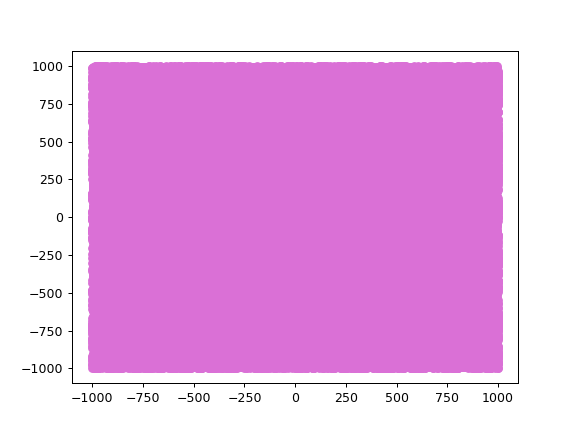

In [23]:
%matplotlib notebook
points = []
for _ in range(10**5):
    x = randint(-1000, 1000)
    y = randint(-1000, 1000)
    points.append((x, y))
    
Plot([PointsCollection(points)]).draw()


    b) 10^5 losowych punktów o współrzędnych z przedziału [-10^14, 10^14],

<IPython.core.display.Javascript object>


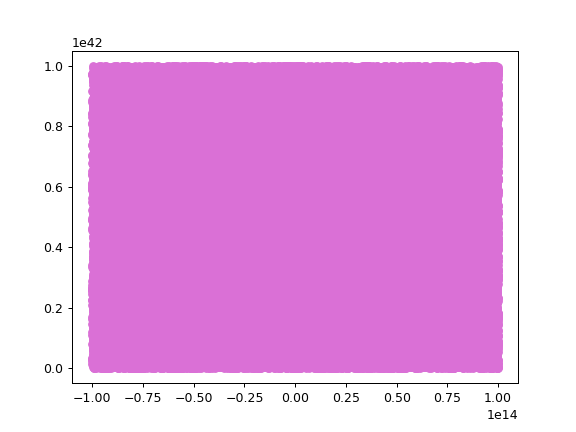

In [26]:
%matplotlib notebook
points = []
for _ in range(10**5):
    x = randint(-(10**14), 10**14)
    y = randint(-(10**14), 1000**14)
    points.append((x, y))
    
Plot([PointsCollection(points)]).draw()

    c) 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100,

<IPython.core.display.Javascript object>


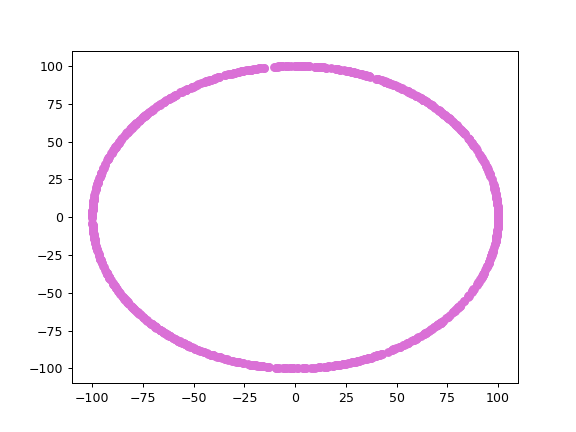

In [34]:
%matplotlib notebook
points = []
radius = 100
for _ in range(1000):
    a = random() * 2 * pi
    x = radius * sin(a)
    y = radius * cos(a)
    points.append((x, y))

Plot([PointsCollection(points)]).draw()

    d) 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej wyznaczonej przez 
    wektor (a, b)
          
    przyjmij a = [-1.0, 0.0], b = [1.0, 0.1]
    
    Współczynniki prostej:
    0.0 = a * (-1.0) + b      --> a = 0.05
    0.1 = a * (1.0) + b       --> b = 0.05
        

<IPython.core.display.Javascript object>


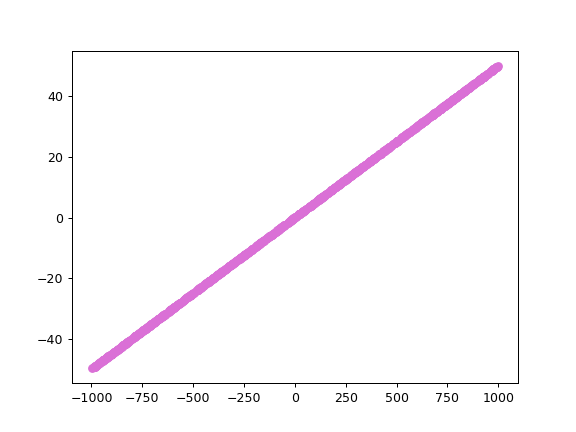

In [39]:
%matplotlib notebook
a = 0.05
b = 0.05
points = []
for _ in range(1000):
    x = randint(-1000, 1000)
    y = a * x + b
    points.append((x, y))

Plot([PointsCollection(points)]).draw()

-------------------------------------------------------------------------------------------------------------------

    Przygotuj program, który dla każdego ze zbioru danych dokona podziału punktów względem ich
    orientacji w stosunku do odcinka ab ( a = [-1.0, 0.0], b = [1.0, 0.1] – punkty znajdujące się po
    lewej stronie, po prawej stronie oraz współliniowe. Obliczenia wykonaj przy pomocy
    wyznacznika (1) i następnie (2) zaimplementowanego samodzielnie. Wyszukaj w bibliotekach
    numerycznych procedury obliczania wyznacznika 3x3 i 2x2. Dla każdego zbioru danych
    porównaj wyniki (podział punktów) uzyskane przy pomocy obu wyznaczników wyliczanych
    procedurami własnymi i bibliotecznymi. Określ, ile punktów (i jakich) zostało inaczej
    zakwalifikowanych dla różnych sposobów liczenia wyznacznika. Zbadaj wyniki dla różnej
    tolerancji dla zera oraz różnych precyzji obliczeń. Odpowiednio zaprezentuj otrzymane wyniki
    w tabelach. 

In [40]:
def det_1(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return a_x*b_y + b_x*c_y + a_y*c_x - b_y*c_x - c_y*a_x - a_y*b_x

In [41]:
def det_2(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return (a_x-c_x)(b_y-c_y) - (a_y-c_y)*(b_x-c_x)

In [42]:
def det_3(a, b, c): 
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    matrix = math.array([[a_x, a_y, 1],
                         [b_x, b_y, 1],
                         [c_x, c_y, 1]])
    det_ = math.linalg.det(matrix)
    return det_

In [43]:
def det_4(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    matrix = math.array([[a_x-c_x, ay-cy],
                         [b_x-c_x, b_y-c_y]])
    det_ = math.linalg.det(matrix)
    return det_